In [1]:
import numpy as np
import time
import matplotlib.pyplot as plt
import subprocess
import os
import pickle

from utils import init_nodes
from spam_cluster import get_response_times
from pod_controller import get_loadbalancer_external_port, set_container_cpu_values

# Set the working directory to the root of the project
current_dir = os.getcwd()
parent_dir = os.path.abspath(os.path.join(current_dir, os.pardir))
os.chdir(parent_dir)

print(f'Current working directory: {os.getcwd()}')

divide_at = 3

interval = 1000
rps = 40
random_rps = False
# every = 3
initial_rps = rps

upper_rps = 60
lower_rps = 30

url = f"http://localhost:{get_loadbalancer_external_port(service_name='ingress-nginx-controller')}"
USERS = 5
recordings = 30
time_step = 5

nodes = init_nodes(debug=True, custom_label='app=localization-api')

apis = 3

action_interval = 5 # Check for thresholding in the config file

initial_container_cpu = 100

Current working directory: /home/jprodanov/resource-elastisity-nancy
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api3', 'localization-api', '10.1.245.5'), ('localization-api1', 'localization-api', '10.1.245.6')]



In [2]:
# Loading command, variable is for more realistic loading of cluster
# command = ['python', 'code/spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--all', '--variable']
command = ['python', 'code/spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--all']

Scaling is run by subproccesses

In [3]:
# Set latex rendering
from matplotlib import rc

rc('text', usetex=True)
rc('font', **{'family': 'serif', 'serif': ['Times New Roman']})

MADQN

In [4]:
set_container_cpu_values(cpus=1000)
for node in nodes:
    for container_id, (_, _, _) in list(node.get_containers().items()):
        (_, _, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
        if cpu_percentage > 20:
            time.sleep(1.5)
        else:
            break

mdqn_rts = []
mdqn_container_recordings = []
set_container_cpu_values(cpus=initial_container_cpu)
time.sleep(5)

Pod localization-api1 patched successfully to 1000m request and 1000m limit
Pod localization-api2 patched successfully to 1000m request and 1000m limit
Pod localization-api3 patched successfully to 1000m request and 1000m limit
Pod localization-api1 patched successfully to 100m request and 100m limit
Pod localization-api2 patched successfully to 100m request and 100m limit
Pod localization-api3 patched successfully to 100m request and 100m limit


In [5]:
spam_process = subprocess.Popen(command)
infer_process = None

for i in range(recordings):
    if i % (recordings // divide_at) == 0 and i != 0 and infer_process is None:
        print(f"Running inference at {i}")
        infer_process = subprocess.Popen(['python', 'code/infer_mdqn.py', '--action_interval', str(action_interval)])

    start_time = time.time()
    rts = [np.mean([rt for rt in get_response_times(USERS, f'{url}/api{api_id}/predict') if rt is not None]) for api_id in range(1, apis + 1)]

    mean_rt = np.mean(rts)
    mdqn_rts.append(mean_rt)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    mdqn_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()
infer_process.terminate()

Loading the cluster with 40 users on http://localhost:31923/api1/predict
Loading the cluster with 40 users on http://localhost:31923/api2/predict
Loading the cluster with 40 users on http://localhost:31923/api3/predict
Running inference at 10
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.6'), ('localization-api3', 'localization-api', '10.1.245.5')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.6'), ('localization-api3', 'localization-api', '10.1.245.5')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 1

Thresholding

In [6]:
set_container_cpu_values(cpus=1000)
for node in nodes:
    for container_id, (_, _, _) in list(node.get_containers().items()):
        (_, _, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
        if cpu_percentage > 20:
            time.sleep(1.5)
        else:
            break

thold_rts = []
thold_container_recordings = []
set_container_cpu_values(cpus=initial_container_cpu)
time.sleep(5)

Pod localization-api1 patched successfully to 1000m request and 1000m limit
Pod localization-api2 patched successfully to 1000m request and 1000m limit
Pod localization-api3 patched successfully to 1000m request and 1000m limit
Pod localization-api1 patched successfully to 100m request and 100m limit
Pod localization-api2 patched successfully to 100m request and 100m limit
Pod localization-api3 patched successfully to 100m request and 100m limit


In [7]:
if random_rps:
    rps = initial_rps

spam_process = subprocess.Popen(command)
infer_process = None

for i in range(recordings):
    if i % (recordings // divide_at) == 0 and i != 0 and infer_process is None:
        print(f"Running inference at {i}")
        infer_process = subprocess.Popen(['python', 'code/threshold_elasticity.py'])

    start_time = time.time()
    rts = [np.mean([rt for rt in get_response_times(USERS, f'{url}/api{api_id}/predict') if rt is not None]) for api_id in range(1, apis + 1)]
    
    mean_rt = np.mean(rts)
    thold_rts.append(mean_rt)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    thold_container_recordings.append(node_recordings)
    
    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()
infer_process.terminate()


Loading the cluster with 40 users on http://localhost:31923/api1/predict
Loading the cluster with 40 users on http://localhost:31923/api2/predict
Loading the cluster with 40 users on http://localhost:31923/api3/predict
Running inference at 10
DEBUG: True, custom_app_label: app=localization-api, scale_cpu: 25, max_cpu: 1000, CPU limits: upper: 60, lower: 30, action_interval: 5
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.6'), ('localization-api3', 'localization-api', '10.1.245.5')]

Pod localization-api2 patched successfully to 50m request and 50m limit
Pod localization-api1 patched successfully to 50m request and 50m limit
Pod localization-api3 patched successfully to 50m request and 50m limit
Pod localization-api2 patched successfully to 75m requ

MADDPG

In [34]:
set_container_cpu_values(cpus=1000)
for node in nodes:
    for container_id, (_, _, _) in list(node.get_containers().items()):
        (_, _, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
        if cpu_percentage > 20:
            time.sleep(1.5)
        else:
            break

ddpg_rts = []
ddpg_container_recordings = []
set_container_cpu_values(cpus=initial_container_cpu)
time.sleep(5)

Pod localization-api1 patched successfully to 1000m request and 1000m limit
Pod localization-api2 patched successfully to 1000m request and 1000m limit
Pod localization-api3 patched successfully to 1000m request and 1000m limit
Pod localization-api1 patched successfully to 100m request and 100m limit
Pod localization-api2 patched successfully to 100m request and 100m limit
Pod localization-api3 patched successfully to 100m request and 100m limit


In [35]:
spam_process = subprocess.Popen(command)
infer_process = None

for i in range(recordings):
    if i % (recordings // divide_at) == 0 and i != 0 and infer_process is None:
        print(f"Running inference at {i}")
        infer_process = subprocess.Popen(['python', 'code/infer_ddpg.py', '--hack', '--action_interval', str(action_interval)])

    start_time = time.time()
    rts = [np.mean([rt for rt in get_response_times(USERS, f'{url}/api{api_id}/predict') if rt is not None]) for api_id in range(1, apis + 1)]

    mean_rt = np.mean(rts)
    ddpg_rts.append(mean_rt)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    ddpg_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()
infer_process.terminate()

Loading the cluster with 40 users on http://localhost:31923/api1/predict
Loading the cluster with 40 users on http://localhost:31923/api2/predict
Loading the cluster with 40 users on http://localhost:31923/api3/predict
Running inference at 10
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.6'), ('localization-api3', 'localization-api', '10.1.245.5')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.6'), ('localization-api3', 'localization-api', '10.1.245.5')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 1

MA instant IPPO

In [10]:
set_container_cpu_values(cpus=1000)
for node in nodes:
    for container_id, (_, _, _) in list(node.get_containers().items()):
        (_, _, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
        if cpu_percentage > 20:
            time.sleep(1.5)
        else:
            break

instant_ppo_rts = []
instant_ppo_container_recordings = []
set_container_cpu_values(cpus=initial_container_cpu)
time.sleep(5)

Pod localization-api1 patched successfully to 1000m request and 1000m limit
Pod localization-api2 patched successfully to 1000m request and 1000m limit
Pod localization-api3 patched successfully to 1000m request and 1000m limit
Pod localization-api1 patched successfully to 100m request and 100m limit
Pod localization-api2 patched successfully to 100m request and 100m limit
Pod localization-api3 patched successfully to 100m request and 100m limit


In [11]:
if random_rps:
    rps = initial_rps

spam_process = subprocess.Popen(command)
infer_process = None

for i in range(recordings):
    if i % (recordings // divide_at) == 0 and i != 0 and infer_process is None:
        print(f"Running inference at {i}")
        infer_process = subprocess.Popen(['python', 'code/infer_ppo.py', '--instant', '--instant_hack', '--load_model', 'code/model_metric_data/ppo/66ep_rf_2_30rps8kepochs5alpha50scale_a0priority_newloading_instantscale_NOreseting_vari_res_pretrained', '--action_interval', str(action_interval)])

    start_time = time.time()
    rts = [np.mean([rt for rt in get_response_times(USERS, f'{url}/api{api_id}/predict') if rt is not None]) for api_id in range(1, apis + 1)]
    
    mean_rt = np.mean(rts)
    instant_ppo_rts.append(mean_rt)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    instant_ppo_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()
infer_process.terminate()

Loading the cluster with 40 users on http://localhost:31923/api1/predict
Loading the cluster with 40 users on http://localhost:31923/api2/predict
Loading the cluster with 40 users on http://localhost:31923/api3/predict
Running inference at 10
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.6'), ('localization-api3', 'localization-api', '10.1.245.5')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.6'), ('localization-api3', 'localization-api', '10.1.245.5')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 1

MA granullar IPPO

In [23]:
set_container_cpu_values(cpus=1000)
for node in nodes:
    for container_id, (_, _, _) in list(node.get_containers().items()):
        (_, _, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
        if cpu_percentage > 20:
            time.sleep(1.5)
        else:
            break

granullar_ppo_rts = []
granular_ppo_container_recordings = []
set_container_cpu_values(cpus=initial_container_cpu)
time.sleep(5)

Pod localization-api1 patched successfully to 1000m request and 1000m limit
Pod localization-api2 patched successfully to 1000m request and 1000m limit
Pod localization-api3 patched successfully to 1000m request and 1000m limit
Pod localization-api1 patched successfully to 100m request and 100m limit
Pod localization-api2 patched successfully to 100m request and 100m limit
Pod localization-api3 patched successfully to 100m request and 100m limit


In [24]:
if random_rps:
    rps = initial_rps

spam_process = subprocess.Popen(command)
infer_process = None

for i in range(recordings):
    if i % (recordings // divide_at) == 0 and i != 0 and infer_process is None:
        print(f"Running inference at {i}")
        # infer_process = subprocess.Popen(['python', 'code/infer_ppo.py', '--load_model', 'code/model_metric_data/ppo/210ep_rf_2_20rps10kepochs5alpha10epupdate50scale_a_1000resources'])
        infer_process = subprocess.Popen(['python', 'code/infer_ppo.py', '--load_model', 'code/model_metric_data/ppo/610ep_rf_2_20rps10kepochs5alpha10epupdate50scale_a_1000resources_pretrained', '--action_interval', str(action_interval)])
    
    start_time = time.time()
    rts = [np.mean([rt for rt in get_response_times(USERS, f'{url}/api{api_id}/predict') if rt is not None]) for api_id in range(1, apis + 1)]
    
    mean_rt = np.mean(rts)
    granullar_ppo_rts.append(mean_rt)

    node_recordings = []
    for node in nodes:
        for container_id, (_, _, _) in list(node.get_containers().items()):
            (cpu_limit, cpu, cpu_percentage), (_, _, _), (_, _), _ = node.get_container_usage(container_id)
            node_recordings.append((cpu_limit, cpu, cpu_percentage))
    granular_ppo_container_recordings.append(node_recordings)

    elapsed_time = time.time() - start_time
    time.sleep(max(0, time_step - elapsed_time))

    # if random_rps and i % every == 0 and i != 0:
    #     rps = np.random.randint(lower_rps, upper_rps)
    #     spam_process.terminate()
    #     spam_process = subprocess.Popen(['python', 'spam_cluster.py', '--users', str(rps), '--interval', str(interval), '--variable'])
spam_process.terminate()
infer_process.terminate()

Loading the cluster with 40 users on http://localhost:31923/api1/predict
Loading the cluster with 40 users on http://localhost:31923/api2/predict
Loading the cluster with 40 users on http://localhost:31923/api3/predict
Running inference at 10
Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.6'), ('localization-api3', 'localization-api', '10.1.245.5')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 10.1.28.195, pods: []
raspberrypi2:193.2.205.183, ca: 10.1.225.1, pods: [('localization-api2', 'localization-api', '10.1.225.46')]
raspberrypi1:193.2.205.192, ca: 10.1.245.4, pods: [('localization-api1', 'localization-api', '10.1.245.6'), ('localization-api3', 'localization-api', '10.1.245.5')]

Observable pods/nodes:
e6-orancloud:193.2.205.13, ca: 1

In [14]:
# # Save data
# data = {
#     'mdqn_rts': mdqn_rts,
#     'thold_rts': thold_rts,
#     'instant_ppo_rts': instant_ppo_rts,
#     'granullar_ppo_rts': granullar_ppo_rts,
#     'initial_rps': initial_rps,
#     'divide_at': divide_at,
#     'ddpg_rts': ddpg_rts
# }
# with open('response_times_data.pkl', 'wb') as f:
#     pickle.dump(data, f)


# Load from a pickle file
# with open('response_times_data.pkl', 'rb') as f:
#     data = pickle.load(f)

# mdqn_rts = data['mdqn_rts']
# thold_rts = data['thold_rts']
# instant_ppo_rts = data['instant_ppo_rts']
# granullar_ppo_rts = data['granullar_ppo_rts']
# initial_rps = data['initial_rps']
# divide_at = data['divide_at']
# ddpg_rts = data['ddpg_rts']

In [40]:
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')


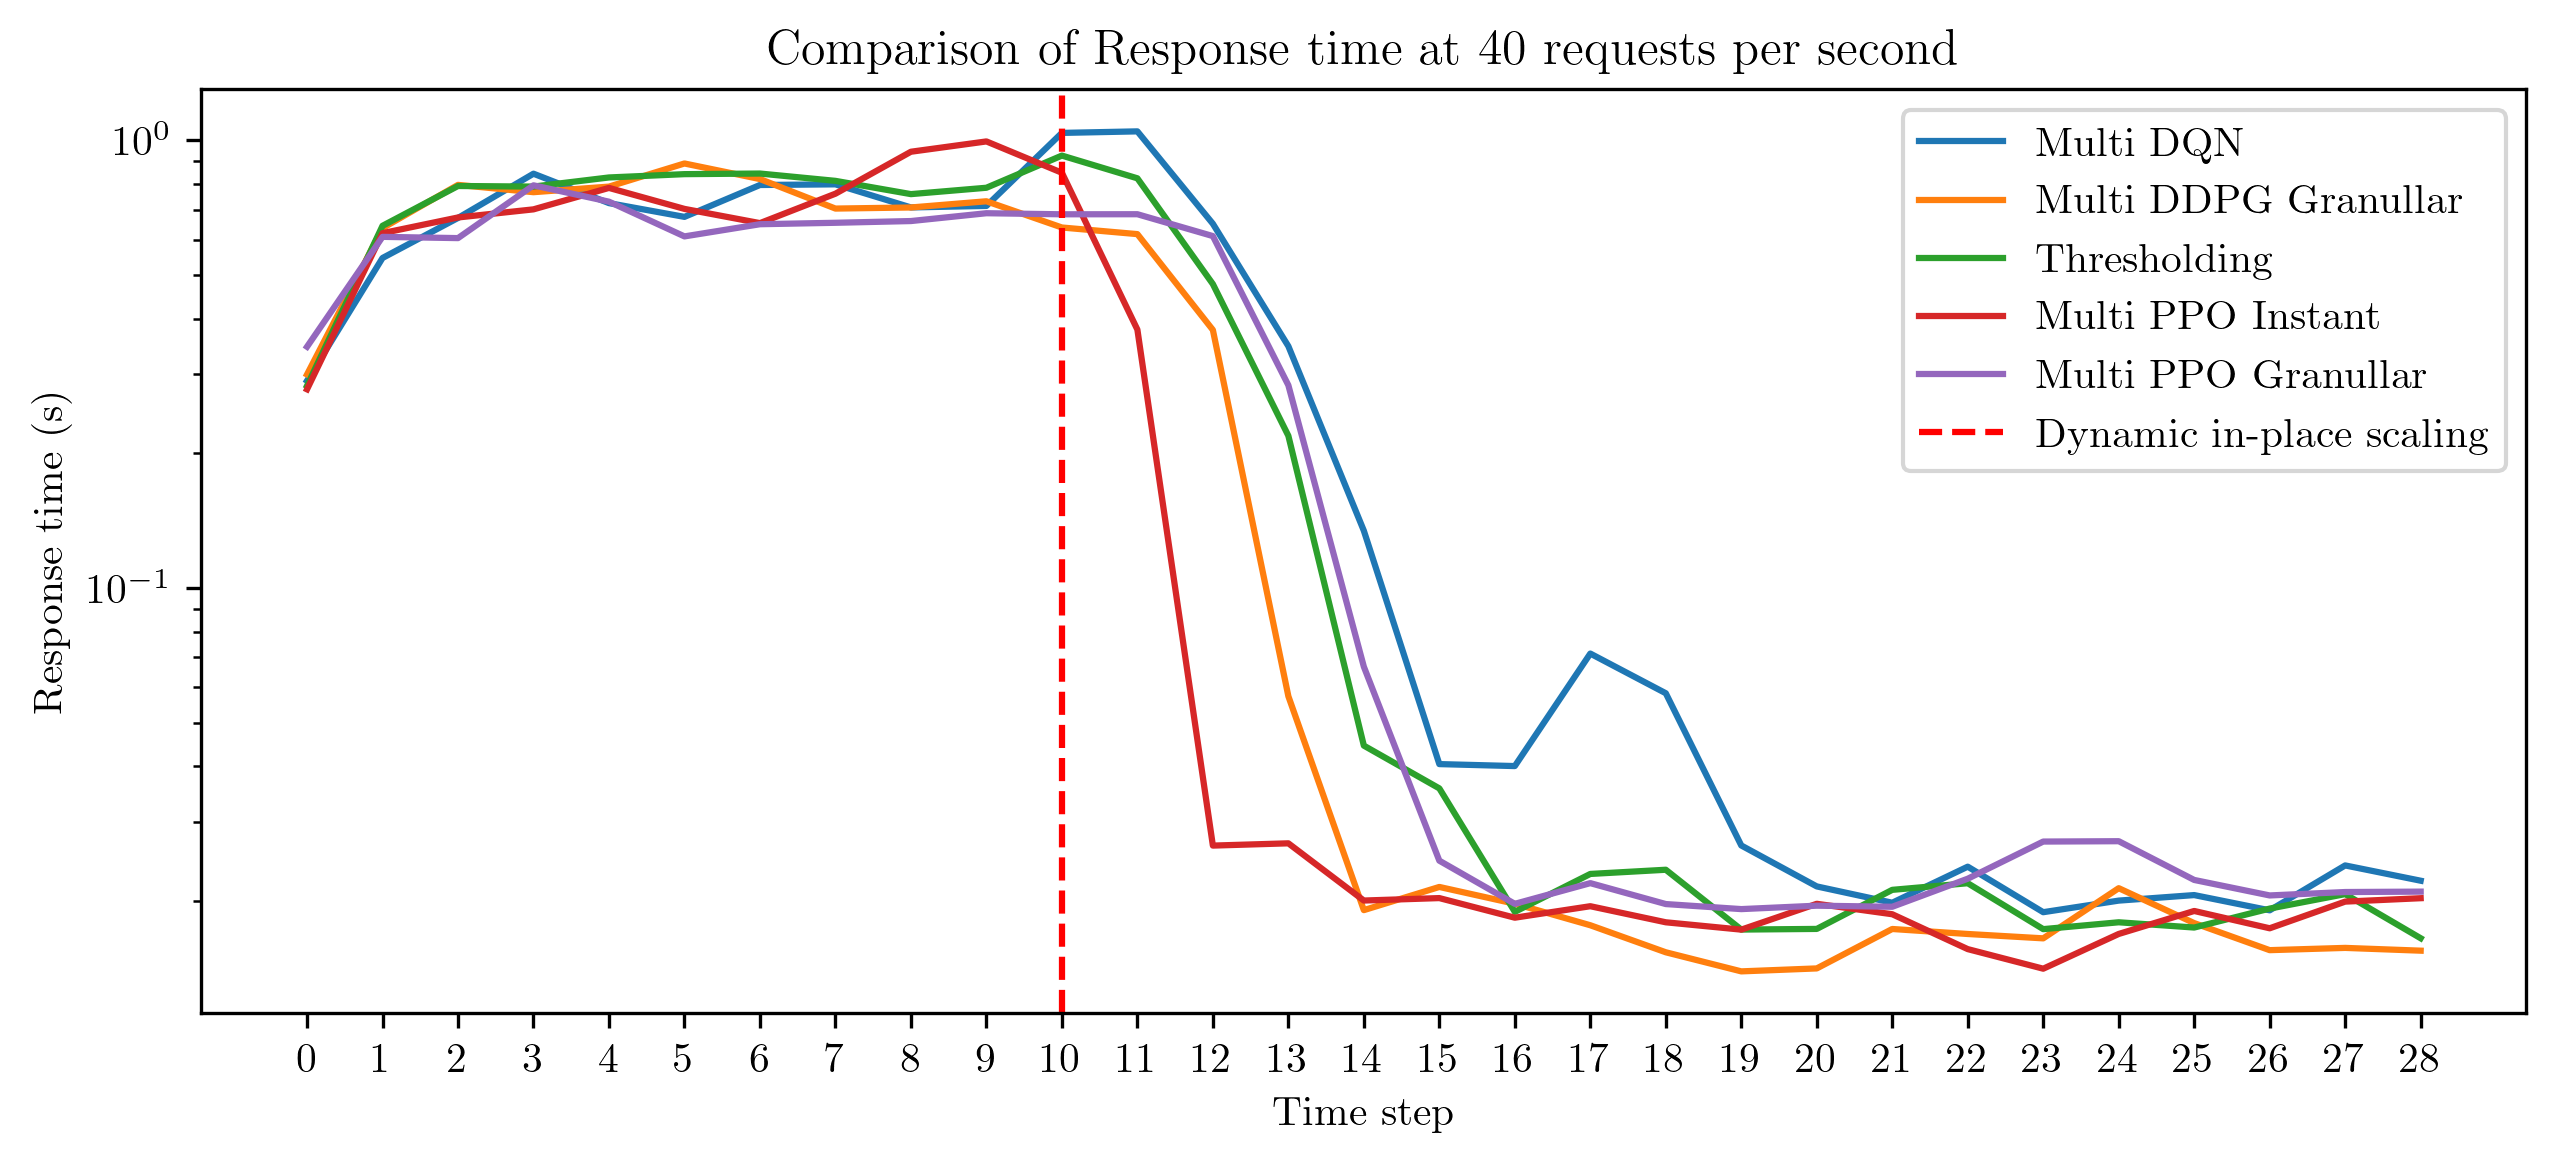

In [62]:
window_size = 2

plt.figure(figsize=(10, 4), dpi=300)
plt.plot(moving_average(mdqn_rts, window_size), label='Multi DQN')
plt.plot(moving_average(ddpg_rts, window_size), label='Multi DDPG Granullar')
plt.plot(moving_average(thold_rts, window_size), label='Thresholding')
plt.plot(moving_average(instant_ppo_rts, window_size), label='Multi PPO Instant')
plt.plot(moving_average(granullar_ppo_rts, window_size), label='Multi PPO Granullar')

middle_x = len(thold_rts) // divide_at
plt.axvline(x=middle_x, color='r', linestyle='--', label='Dynamic in-place scaling')

plt.xlabel('Time step')
plt.yscale('log')
plt.ylabel('Response time (s)')
plt.title(f'Comparison of Response time at {initial_rps} requests per second')
plt.legend()

plt.xticks(range(len(thold_rts) - window_size + 1))

plt.show()

In [32]:
print(f"Thresholding: {np.mean(thold_rts)}\nMDQN: {np.mean(mdqn_rts)}\nInstant PPO: {np.mean(instant_ppo_rts)}\nGranullar PPO: {np.mean(granullar_ppo_rts)}\nGranullar PPO: {np.mean(ddpg_rts)}")

Thresholding: 0.33885910500000005
MDQN: 0.34783794
Instant PPO: 0.2899223388888889
Granullar PPO: 0.3001109244444444
Granullar PPO: 0.3237364194444444


In [63]:
print(f"Thresholding: {np.mean(thold_rts[len(mdqn_container_recordings) // divide_at:])}\nMDQN: {np.mean(mdqn_rts[len(mdqn_container_recordings) // divide_at:])}\nInstant PPO: {np.mean(instant_ppo_rts[len(mdqn_container_recordings) // divide_at:])}\nGranullar PPO: {np.mean(granullar_ppo_rts[len(mdqn_container_recordings) // divide_at:])}\nGranullar DDPG: {np.mean(ddpg_rts[len(mdqn_container_recordings) // divide_at:])}")

Thresholding: 0.15818879083333331
MDQN: 0.20293470500000005
Instant PPO: 0.10192601500000001
Granullar PPO: 0.15116964416666667
Granullar DDPG: 0.11535282083333331


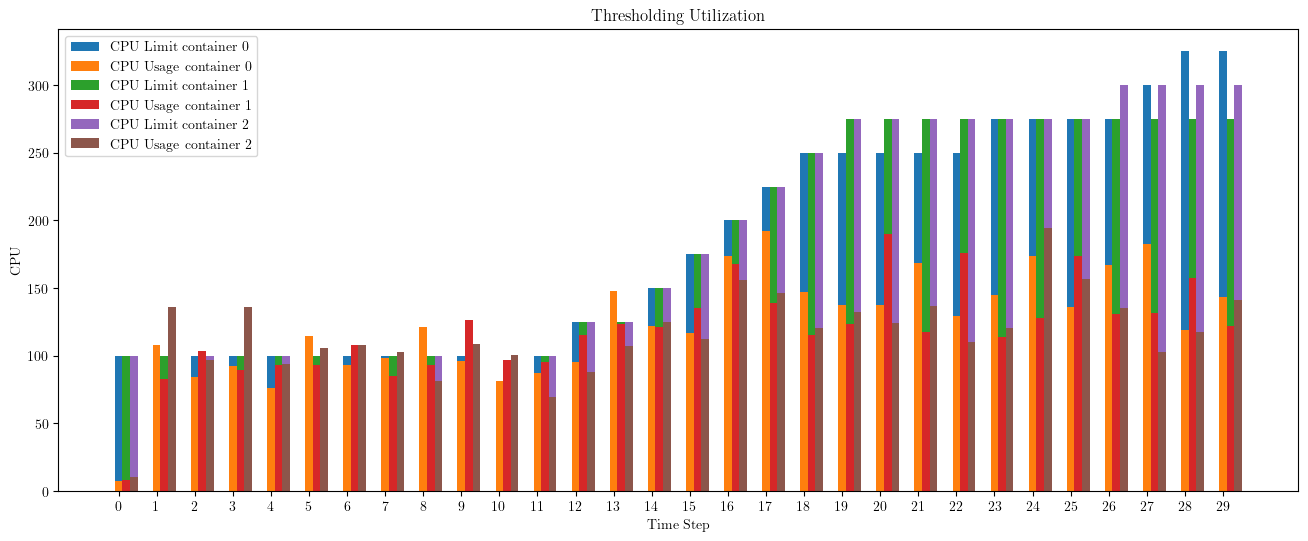

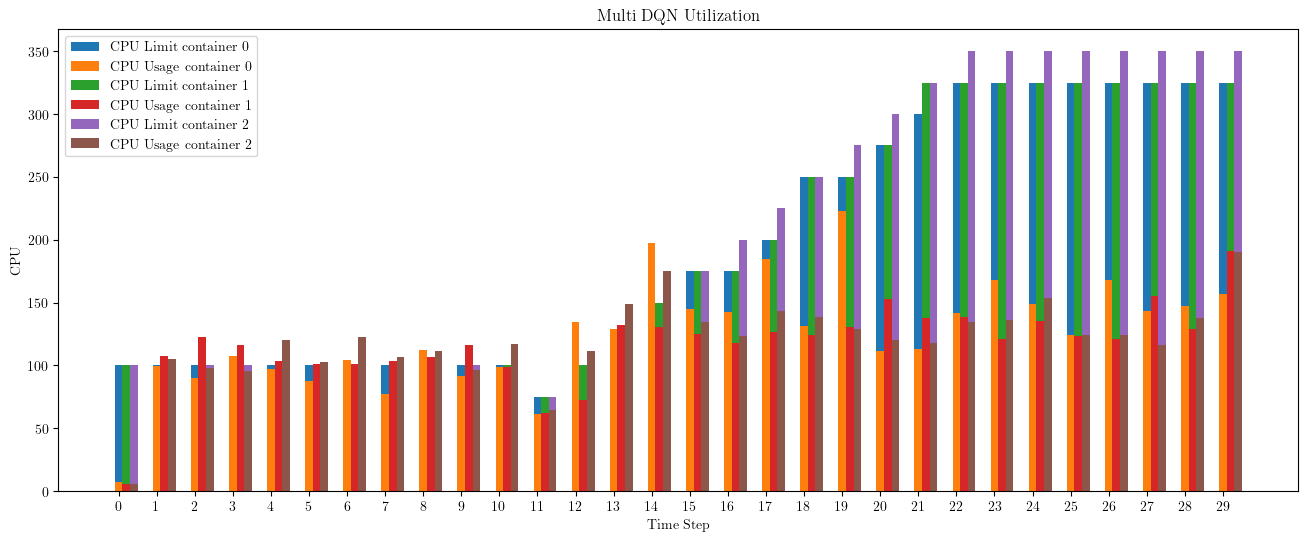

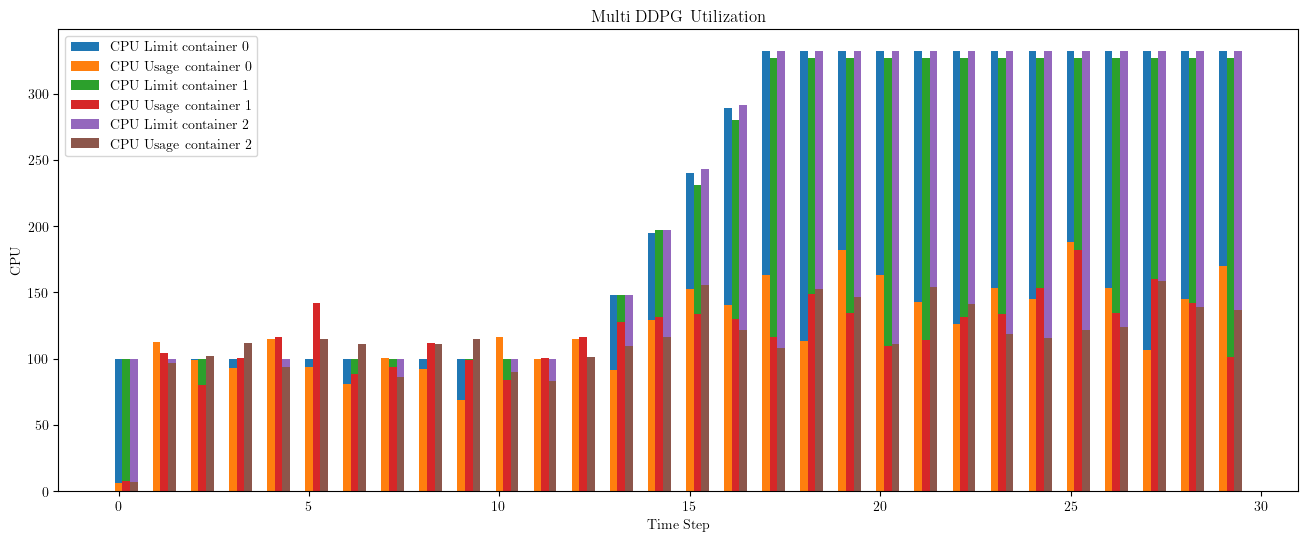

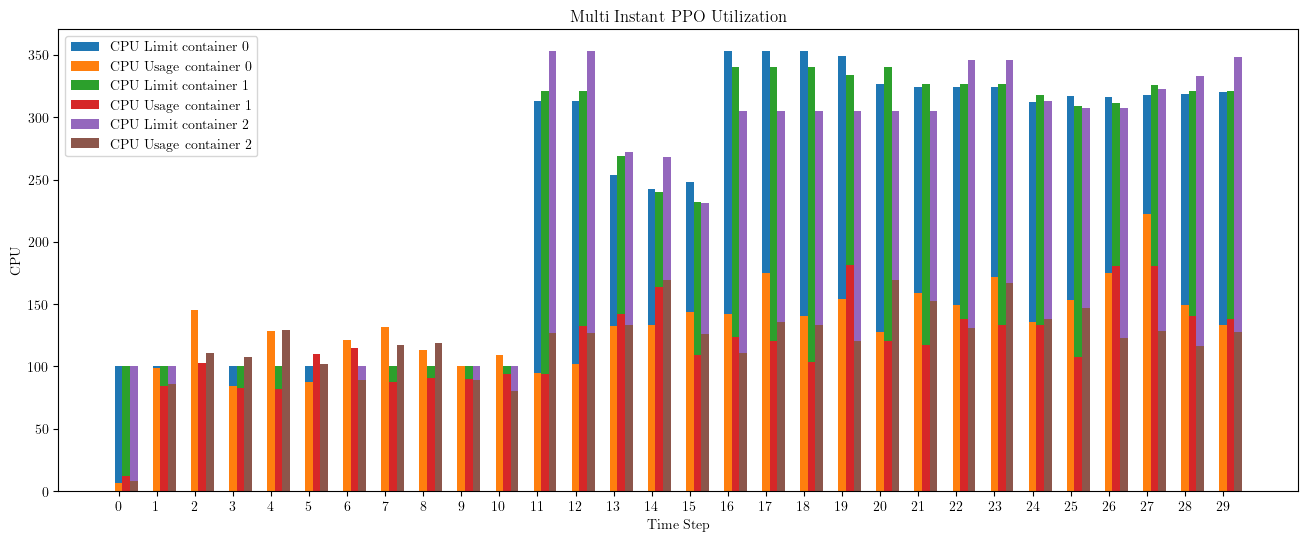

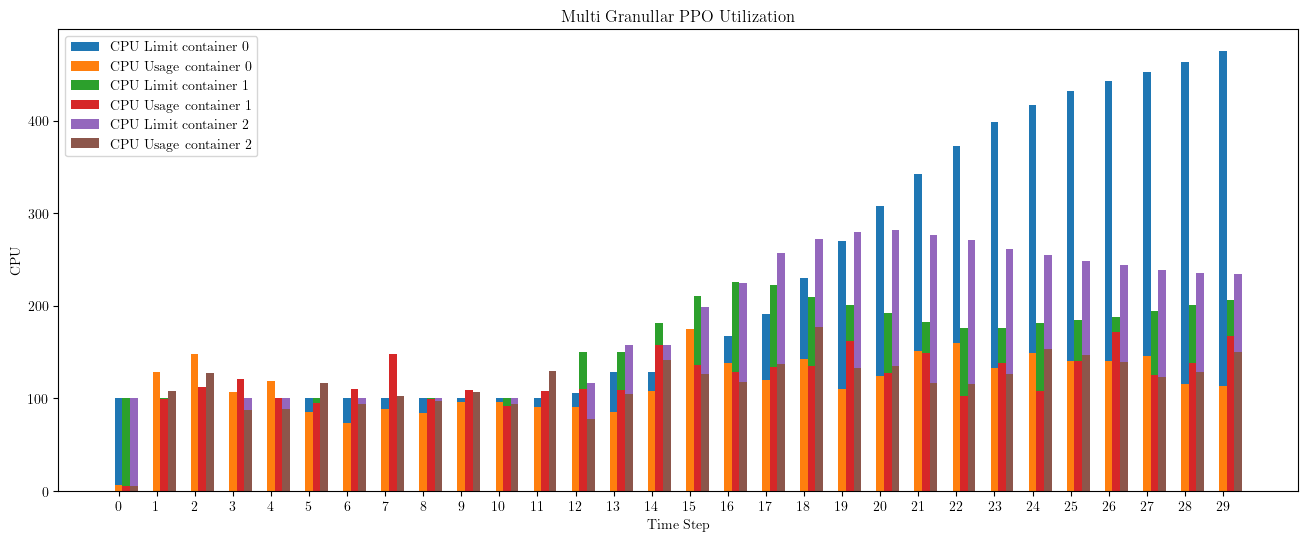

In [37]:
time_axis = range(len(thold_container_recordings))

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*thold_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Thresholding Utilization')
plt.xticks(time_axis)
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*mdqn_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Multi DQN Utilization')
plt.xticks(time_axis)
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*ddpg_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Multi DDPG Utilization')
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*instant_ppo_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Multi Instant PPO Utilization')
plt.xticks(time_axis)
plt.legend()
plt.show()

plt.figure(figsize=(16, 6))
for i, container_recordings in enumerate(zip(*granular_ppo_container_recordings)):
    cpu_limits, cpu, _ = zip(*container_recordings)
    plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
    plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
plt.xlabel('Time Step')
plt.ylabel('CPU')
plt.title('Multi Granullar PPO Utilization')
plt.xticks(time_axis)
plt.legend()
plt.show()

In [29]:
mdqn_means = [np.mean([min(cpu_percentage, 100) for _, _, cpu_percentage in entry]) for entry in mdqn_container_recordings]
thold_means = [np.mean([min(cpu_percentage, 100) for _, _, cpu_percentage in entry]) for entry in thold_container_recordings]
granular_ppo_means = [np.mean([min(cpu_percentage, 100) for _, _, cpu_percentage in entry]) for entry in granular_ppo_container_recordings]
instant_ppo_means = [np.mean([min(cpu_percentage, 100) for _, _, cpu_percentage in entry]) for entry in instant_ppo_container_recordings]
ddpg_means = [np.mean([min(cpu_percentage, 100) for _, _, cpu_percentage in entry]) for entry in ddpg_container_recordings]

In [30]:
# import pickle

# # Saving
# data = {
#     'mdqn_means': mdqn_means,
#     'thold_means': thold_means,
#     'granular_ppo_means': granular_ppo_means,
#     'instant_ppo_means': instant_ppo_means
# }

# with open('means_data.pkl', 'wb') as f:
#     pickle.dump(data, f)


# # Loading
# with open('means_data.pkl', 'rb') as f:
#     data = pickle.load(f)

# mdqn_means = data['mdqn_means']
# thold_means = data['thold_means']
# granular_ppo_means = data['granular_ppo_means']
# instant_ppo_means = data['instant_ppo_means']

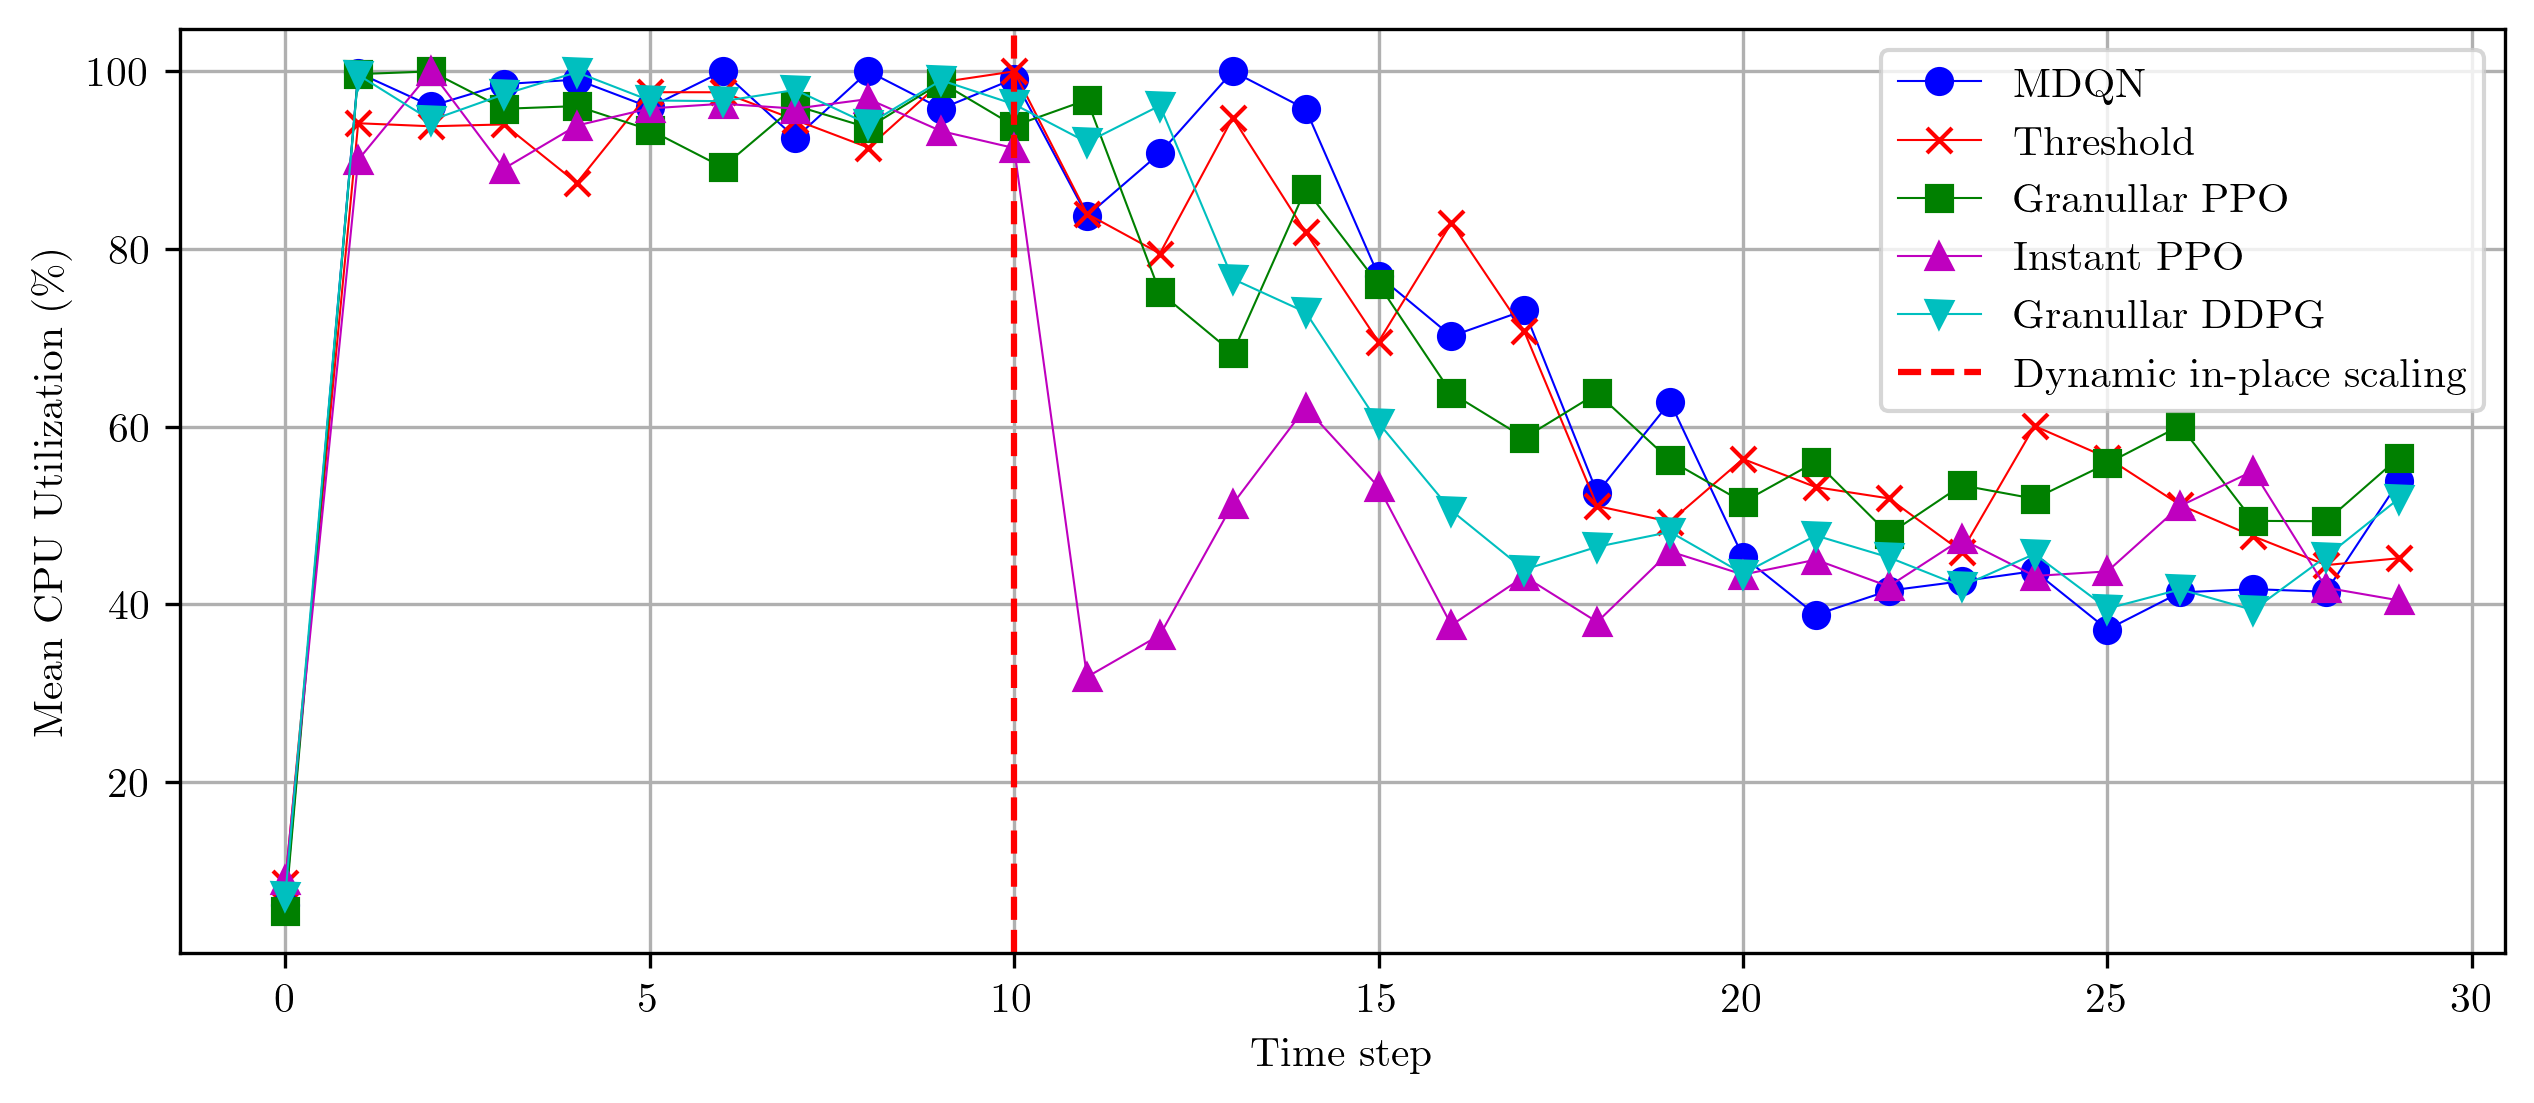

In [31]:
plt.figure(figsize=(10, 4), dpi=300)
plt.plot(mdqn_means, marker='o', linestyle='-', color='b', label='MDQN', linewidth=0.5)
plt.plot(thold_means, marker='x', linestyle='-', color='r', label='Threshold', linewidth=0.5)
plt.plot(granular_ppo_means, marker='s', linestyle='-', color='g', label='Granullar PPO', linewidth=0.5)
plt.plot(instant_ppo_means, marker='^', linestyle='-', color='m', label='Instant PPO', linewidth=0.5)
plt.plot(ddpg_means, marker='v', linestyle='-', color='c', label='Granullar DDPG', linewidth=0.5)

middle_x = len(thold_rts) // divide_at
plt.axvline(x=middle_x, color='r', linestyle='--', label='Dynamic in-place scaling')

plt.xlabel(r'Time step')
plt.ylabel(r'Mean CPU Utilization (\%)')

plt.grid(True)
plt.legend()

plt.show()

In [22]:
# time_axis = range(len(thold_container_recordings))

# plt.figure(figsize=(16, 6))
# for i, container_recordings in enumerate(zip(*thold_container_recordings)):
#     cpu_limits, cpu, cpu_percentage = zip(*container_recordings)
#     plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
#     plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
# plt.xlabel('Time Step')
# plt.ylabel('CPU')
# plt.title('Thresholding Utilization')
# plt.xticks(time_axis)
# plt.legend()
# plt.show()

# plt.figure(figsize=(16, 6))
# for i, container_recordings in enumerate(zip(*mdqn_container_recordings)):
#     cpu_limits, cpu, cpu_percentage = zip(*container_recordings)
    
#     plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
#     plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
# plt.xlabel('Time Step')
# plt.ylabel('CPU')
# plt.title('Multi DQN Utilization')
# plt.xticks(time_axis)
# plt.legend()
# plt.show()

# # plt.figure(figsize=(16, 6))
# # for i, container_recordings in enumerate(zip(*ddpg_container_recordings)):
# #     cpu_limits, cpu, _ = zip(*container_recordings)
# #     plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
# #     plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
# # plt.xlabel('Time Step')
# # plt.ylabel('CPU')
# # plt.title('Multi DDPG Utilization')
# # plt.legend()
# # plt.show()

# plt.figure(figsize=(16, 6))
# for i, container_recordings in enumerate(zip(*instant_ppo_container_recordings)):
#     cpu_limits, cpu, cpu_percentage = zip(*container_recordings)
#     plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
#     plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
# plt.xlabel('Time Step')
# plt.ylabel('CPU')
# plt.title('Multi Instant PPO Utilization')
# plt.xticks(time_axis)
# plt.legend()
# plt.show()

# plt.figure(figsize=(16, 6))
# for i, container_recordings in enumerate(zip(*granular_ppo_container_recordings)):
#     cpu_limits, cpu, cpu_percentage = zip(*container_recordings)
#     plt.bar(np.array(time_axis) + i*0.2, cpu_limits, width=0.2, label=f'CPU Limit container {i}')
#     plt.bar(np.array(time_axis) + i*0.2, cpu, width=0.2, label=f'CPU Usage container {i}')
# plt.xlabel('Time Step')
# plt.ylabel('CPU')
# plt.title('Multi Granullar PPO Utilization')
# plt.xticks(time_axis)
# plt.legend()
# plt.show()